In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
insurance = pd.read_csv("C:\\Users\\nural\\OneDrive\\Documents\\Learn Data\\Pacmann Project\\Probability Project\\insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check null data
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#check duplicated data
insurance[insurance.duplicated(keep=False)].sum()

age                         38
sex                   malemale
bmi                      61.18
children                     0
smoker                    nono
region      northwestnorthwest
charges              3279.1262
dtype: object

In [6]:
#drop duplicated data
insurance.drop_duplicates(keep='first', inplace=True)

In [7]:
# Check Datatype
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
# Check statistik deskriptif tiap tabel
insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


   Analisa Descriptive Statistic 
1. Berapa rata rata umur pada data tersebut?
2. Berapa rata rata nilai BMI dari yang merokok?
3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [9]:
#Berapa rata rata umur pada data tersebut?
mean_umur = insurance['age'].mean()
print(f"Rata-rata umur pada data tersebut adalah {mean_umur}")

#Berapa rata rata nilai BMI dari yang merokok?
smoker = insurance.loc[insurance['smoker'] == 'yes']
non_smoker = insurance.loc[insurance['smoker'] == 'no']

avg_bmi_smoker = smoker['bmi'].mean()
print(f"Rata-rata nilai BMI dari yang merokok pada data tersebut adalah {avg_bmi_smoker}")

#Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

smoker_var = smoker['charges'].var()
smoker_std = smoker['charges'].std()

non_smoker_var = non_smoker['charges'].var()
non_smoker_std = non_smoker['charges'].std()

print(f"Variansi dari tagihan kesehatan perokok pada data tersebut adalah {smoker_var}")
print(f"Variansi dari tagihan kesehatan non perokok pada data tersebut adalah {non_smoker_var}")
print('Variansi dari tagihan kesehatan perokok dan non perokok tidak sama.')

#Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

#smoker
male_smoker = smoker.loc[smoker['sex'] == 'male']
female_smoker = smoker.loc[smoker['sex'] == 'female']

#non smoker
male_non_smoker = non_smoker.loc[non_smoker['sex'] == 'male']
female_non_smoker = non_smoker.loc[non_smoker['sex'] == 'female']

#rata-rata umur male smoker
male_smoker_age_mean = male_smoker['age'].mean()
print(f'Rata-rata umur perokok laki-laki adalah {male_smoker_age_mean}')
#rata-rata umur female smoker
female_smoker_age_mean = female_smoker['age'].mean()
print(f'Rata-rata umur perokok perempuan adalah {female_smoker_age_mean}')
print('Rata-rata umur perokok perempuan dan laki-laki tidak sama.')

# Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
smoker_charges_mean = smoker['charges'].mean()
non_smoker_charges_mean = non_smoker['charges'].mean()

if smoker_charges_mean > non_smoker_charges_mean:
    print(f"Rata-rata tagihan kesehatan perokok ({smoker_charges_mean}) lebih tinggi daripada non perokok ({non_smoker_charges_mean})")
elif smoker_charges_mean < non_smoker_charges_mean:
    print(f"Rata-rata tagihan kesehatan perokok ({smoker_charges_mean}) lebih rendah daripada non perokok ({non_smoker_charges_mean})")
else :
    print("Rata-rata tagihan kesehatan perokok sama dengan non perokok")

Rata-rata umur pada data tersebut adalah 39.222139117427076
Rata-rata nilai BMI dari yang merokok pada data tersebut adalah 30.708448905109503
Variansi dari tagihan kesehatan perokok pada data tersebut adalah 133207311.20634921
Variansi dari tagihan kesehatan non perokok pada data tersebut adalah 35915734.96876324
Variansi dari tagihan kesehatan perokok dan non perokok tidak sama.
Rata-rata umur perokok laki-laki adalah 38.44654088050314
Rata-rata umur perokok perempuan adalah 38.608695652173914
Rata-rata umur perokok perempuan dan laki-laki tidak sama.
Rata-rata tagihan kesehatan perokok (32050.23183153285) lebih tinggi daripada non perokok (8440.660306508935)


Analisa Variabel Diskrit

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?


In [10]:
male = insurance.loc[insurance['sex'] == 'male']
female = insurance.loc[insurance['sex'] == 'female']

# Gender mana yang memiliki tagihan paling tinggi?

male_charges_sum = male['charges'].sum()
female_charges_sum = female['charges'].sum()
if male_charges_sum > female_charges_sum:
    print(f"Jumlah tagihan laki-laki ({male_charges_sum}) lebih tinggi dibanding perempuan ({female_charges_sum})")
elif male_charges_sum < female_charges_sum:
    print(f"Jumlah tagihan laki-laki ({male_charges_sum}) lebih rendah dibanding perempuan ({female_charges_sum})")
else :
    print(f"Jumlah tagihan laki-laki ({male_charges_sum}) sama dengan perempuan ({female_charges_sum})")
    
male_charges_max = male['charges'].max()
female_charges_max = female['charges'].max()
if male_charges_max > female_charges_max:
    print(f"Laki-laki memiliki tagihan ({male_charges_max}) lebih tinggi dibanding perempuan ({female_charges_max})")
elif male_charges_max < female_charges_max:
    print(f"Perempuan memiliki tagihan ({female_charges_max}) lebih tinggi dibanding laki-laki ({male_charges_max})")
else :
    print(f"Laki-laki memiliki tagihan ({male_charges_max}) sama dengan perempuan ({female_charges_max})")

Jumlah tagihan laki-laki (9433124.233040001) lebih tinggi dibanding perempuan (8321061.194619)
Perempuan memiliki tagihan (63770.42801) lebih tinggi dibanding laki-laki (62592.87309)


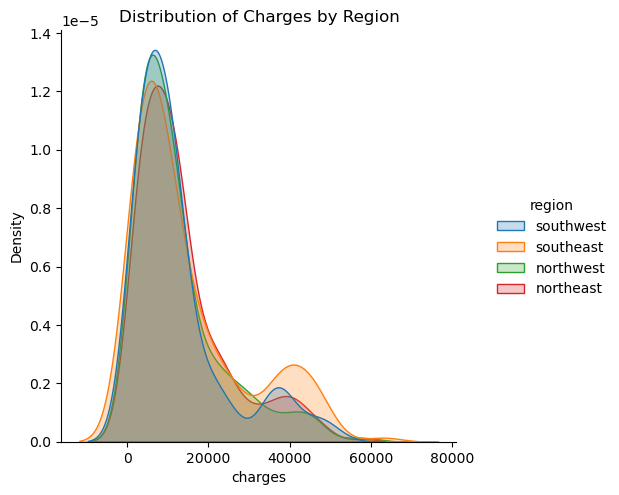

In [11]:
# Distribusi peluang tagihan di tiap-tiap region

sns.displot(insurance, x="charges", hue="region", kind="kde", legend=True, fill=True)
plt.title('Distribution of Charges by Region')
plt.show()


In [12]:
# Apakah setiap region memiliki proporsi data banyak orang yang sama?
count_by_region = insurance['region'].value_counts()
total_count = len(insurance)
proporsi_by_region = count_by_region / total_count
if (proporsi_by_region - proporsi_by_region.mean()).abs().max() < 0.01:
    print("Setiap region memiliki proporsi data banyak orang yang sama.")
    print(proporsi_by_region)
else:
    print("Setiap region tidak memiliki proporsi data banyak orang yang sama.")
    print(proporsi_by_region)


Setiap region tidak memiliki proporsi data banyak orang yang sama.
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64


In [13]:
# Mana yang lebih tinggi proporsi perokok atau non perokok?
count_by_smoker = insurance['smoker'].value_counts()
proporsi_by_smoker = count_by_smoker / total_count
if (proporsi_by_smoker - proporsi_by_smoker.mean()).abs().max() < 0.01:
    print("Proporsi perokok lebih tinggi")
    print(proporsi_by_smoker)
else:
    print("Proporsi non perokok lebih tinggi")
    print(proporsi_by_smoker)

Proporsi non perokok lebih tinggi
no     0.795064
yes    0.204936
Name: smoker, dtype: float64


In [14]:
# Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
# menghitung P(A dan B)
p_wanita_perokok = len(insurance[(insurance['sex'] == 'female') & (insurance['smoker'] == 'yes')])

# menghitung P(B)
p_perokok = len(insurance[insurance['smoker'] == 'yes'])

# menghitung P(A | B)
p_wanita_given_perokok = (p_wanita_perokok / p_perokok)

print("Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah: ", p_wanita_given_perokok)


Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah:  0.4197080291970803


### Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi

    a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

    b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi

    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
    diatas 16.7k


In [15]:
# Hitung proporsi data dengan BMI di atas 25 dan tagihan kesehatan di atas 16.7k
prop_a = ((insurance['bmi'] > 25) & (insurance['charges'] > 16700)).sum() / len(insurance)

# Hitung proporsi data dengan BMI di bawah 25 dan tagihan kesehatan di atas 16.7k
prop_b = ((insurance['bmi'] < 25) & (insurance['charges'] > 16700)).sum() / len(insurance)

print('Proporsi kasus a:', prop_a)
print('Proporsi kasus b:', prop_b)


Proporsi kasus a: 0.21166791323859388
Proporsi kasus b: 0.0381451009723261


In [16]:
# Kasus a
a = len(insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)])

# Kasus b
b = len(insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)])

# Proporsi kasus a
prop_a = a / len(insurance)

# Proporsi kasus b
prop_b = b / len(insurance)

print("Proporsi kasus a:", prop_a)
print("Proporsi kasus b:", prop_b)


Proporsi kasus a: 0.16080777860882572
Proporsi kasus b: 0.050860134629768135


### Analisa Korelasi Variabel

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


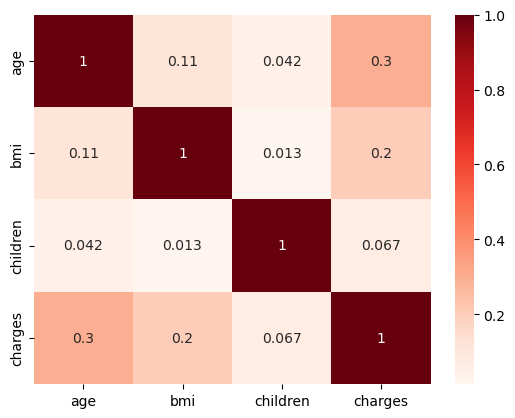

In [17]:
# menghitung korelasi antara kolom numerik
corr = insurance.corr()

# print hasil korelasi
print(corr)

# menampilkan heatmap
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()


### Pengujian Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

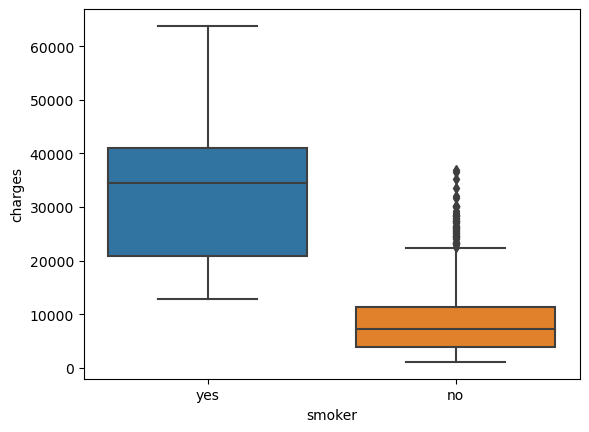

t-value: 32.7423097372529
p-value: 6.261720774727631e-103
Tidak cukup bukti untuk menolak hipotesis nol


In [52]:
# Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

# buat boxplot untuk menampilkan distribusi tagihan kesehatan perokok dan non-perokok
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.show()

# hitung nilai p menggunakan independent t-test
perokok = insurance[insurance['smoker'] == 'yes']['charges']
non_perokok = insurance[insurance['smoker'] == 'no']['charges']
t, p = ttest_ind(perokok, non_perokok, equal_var=False)

# tampilkan hasil uji hipotesis
print('t-value:', t)
print('p-value:', p)
if p > 0.05:
    print('Hipotesis nol ditolak, ada perbedaan signifikan antara tagihan kesehatan perokok dan non-perokok')
else:
    print('Tidak cukup bukti untuk menolak hipotesis nol')


In [20]:
perokok = insurance[insurance['smoker'] == 'yes']['charges']
non_perokok = insurance[insurance['smoker'] == 'no']['charges']

# hitung nilai p menggunakan independent t-test
stat, p = ttest_ind(a = perokok, b = non_perokok, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > 0.05:
    print("Hipotesis nol gagal ditolak, tidak ada perbedaan signifikan antara tagihan kesehatan perokok dan non-perokok")
else:
    print("Hipotesis alternatif diterima, tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok")

Statistics = 32.7423, p-value = 0.0000
Hipotesis alternatif diterima, tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non-perokok


In [21]:
print(perokok.var())
print(non_perokok.var())
print(perokok.mean())
print(non_perokok.mean())

133207311.20634921
35915734.96876324
32050.23183153285
8440.660306508935


In [22]:
len(perokok)

274

In [23]:
from scipy.stats import norm

# input data
mean1 = 32050.23183153285
mean2 = 8440.660306508935
var1 = 133207311.20634921
var2 = 35915734.96876324
n1 = 274
n2 = 1063

# hitung z-score
num = mean1 - mean2
denom = np.sqrt((var1/n1) + (var2/n2))
z_score = num / denom

# tentukan nilai kritis
alpha = 0.05
df = n1 + n2 - 2
z_alpha = norm.ppf(1 - alpha/2, loc=0, scale=1)

# bandingkan dengan nilai kritis
if z_score > z_alpha:
    print("H0 ditolak. Rata-rata tagihan perokok lebih tinggi daripada rata-rata tagihan non-perokok.")
else:
    print("H0 tidak ditolak. Tidak cukup bukti untuk menyatakan bahwa rata-rata tagihan perokok lebih tinggi daripada rata-rata tagihan non-perokok.")

H0 ditolak. Rata-rata tagihan perokok lebih tinggi daripada rata-rata tagihan non-perokok.


In [24]:
z_alpha

1.959963984540054

In [25]:
# filter data dengan BMI diatas 25 dan dibawah 25
above_bmi = insurance[insurance['bmi'] > 25]['charges']
below_bmi = insurance[insurance['bmi'] <= 25]['charges']

# uji hipotesis
alpha = 0.05
t_stat, p_val = ttest_ind(above_bmi, below_bmi)

if p_val < alpha:
    print('Tingkat signifikansi: {}'.format(alpha))
    print('t-value: {}'.format(t_stat))
    print('p-value: {}'.format(p_val))
    print('Hipotesis alternatif diterima, tagihan kesehatan dengan BMI diatas 25 lebih tinggi dari tagihan kesehatan dengan BMI dibawah 25')
else:
    print('Tingkat signifikansi: {}'.format(alpha))
    print('t-value: {}'.format(t_stat))
    print('p-value: {}'.format(p_val))
    print('Hipotesis nol diterima, tidak terdapat perbedaan signifikan antara tagihan kesehatan dengan BMI diatas 25 dan tagihan kesehatan dengan BMI dibawah 25')

Tingkat signifikansi: 0.05
t-value: 4.332975576702388
p-value: 1.5812917593118906e-05
Hipotesis alternatif diterima, tagihan kesehatan dengan BMI diatas 25 lebih tinggi dari tagihan kesehatan dengan BMI dibawah 25


In [26]:
# membuat subset data laki-laki dan perempuan
male_insurance = insurance[insurance['sex'] == 'male']
female_insurance = insurance[insurance['sex'] == 'female']

# menghitung mean tagihan kesehatan untuk masing-masing kelompok
male_mean_charge = male_insurance['charges'].mean()
female_mean_charge = female_insurance['charges'].mean()

# uji perbedaan mean menggunakan t-test
t, p = ttest_ind(male_insurance['charges'], female_insurance['charges'])
print('t-value:', t)
print('p-value:', p)

if p < 0.05:
    print('Hipotesis alternatif diterima, tagihan kesehatan laki-laki lebih besar dari perempuan')
else:
    print('Hipotesis nol diterima, tidak ada perbedaan yang signifikan antara tagihan kesehatan laki-laki dan perempuan')

t-value: 2.124391307062026
p-value: 0.0338207919951195
Hipotesis alternatif diterima, tagihan kesehatan laki-laki lebih besar dari perempuan
